In [13]:
import torch
print(torch.__version__)


2.3.1+cu118


In [15]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.4840, 0.9054, 0.5715],
        [0.4681, 0.5161, 0.5351],
        [0.1452, 0.6188, 0.7211],
        [0.7194, 0.8161, 0.7220],
        [0.1596, 0.6406, 0.1153]])


In [16]:
import torch
torch.cuda.is_available()

True

In [17]:
import torch
print(torch.backends.cudnn.version())


8700


In [10]:
# Vector
vector = torch.tensor([11,11, 11])
print(vector.ndim)

1


In [14]:
vector.shape

torch.Size([3])

In [16]:
print(vector[0])

tensor(11)


In [17]:
# Matrix
MATRIX = torch.tensor([[7, 8], 
                       [9, 10], 
                       [11,11]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10],
        [11, 11]])

In [18]:
MATRIX.shape

torch.Size([3, 2])

In [4]:
# Create a random tensor of size (224, 224, 3)
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

In [18]:
# Create a tensor
some_tensor = torch.rand(3, 4)

# Find out details about it
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}") # will default to CPU

tensor([[0.1428, 0.3547, 0.8905, 0.3400],
        [0.5630, 0.4723, 0.2720, 0.6572],
        [0.3881, 0.3083, 0.5560, 0.5973]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


Using device: cuda
Epoch [100/1000], Loss: 0.8525
Epoch [200/1000], Loss: 0.8217
Epoch [300/1000], Loss: 0.8115
Epoch [400/1000], Loss: 0.8082
Epoch [500/1000], Loss: 0.8071
Epoch [600/1000], Loss: 0.8068
Epoch [700/1000], Loss: 0.8066
Epoch [800/1000], Loss: 0.8066
Epoch [900/1000], Loss: 0.8066
Epoch [1000/1000], Loss: 0.8066


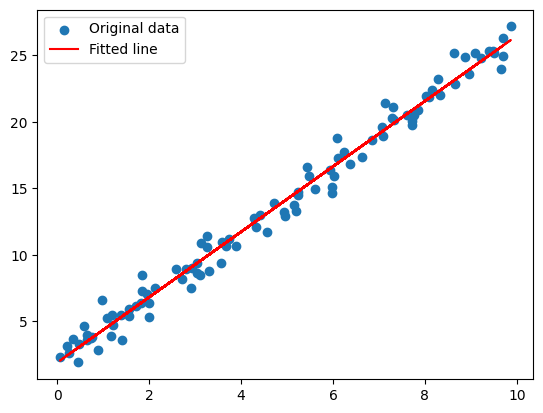

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Step 1: Generate synthetic data
np.random.seed(42)
x = np.random.rand(100, 1) * 10  # Features
y = 2.5 * x + 1.7 + np.random.randn(100, 1)  # Targets with noise

# Convert data to torch tensors and move them to the device
x_tensor = torch.tensor(x, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y, dtype=torch.float32).to(device)

# Step 2: Define the model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input and one output

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel().to(device)

# Step 3: Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Step 4: Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    
    # Forward pass
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Step 5: Plot the results
model.eval()
predicted = model(x_tensor).detach().cpu().numpy()  # Move the predictions back to CPU for plotting

plt.scatter(x, y, label='Original data')
plt.plot(x, predicted, label='Fitted line', color='r')
plt.legend()
plt.show()


In [35]:
import torch
x = torch.tensor([1, 2, 3])
x.shape

torch.Size([3])